In [1]:
import cgc

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
delta = .1
mu = 2
radius = 1
su = 3

numSamples = 20

In [5]:
particlesArr = []

for i in range(numSamples):
    # Create a nucleus and proton object
    nucleus = cgc.Nucleus(su, N, delta, mu)
    proton = cgc.Proton(su, N, delta, mu, radius)

    # Create a collision using these two objects
    col = cgc.Collision(nucleus, proton)

    particlesArr.append(col.particlesProduced())
    momentaArr = col.momentaBins() # Shouldn't change

In [9]:
def statisticalBootstrap(arr, func, M):
    r"""
    Statistical bootstrap method for calculating the variance of an ensemble by resampling
    said ensemble.

    Parameters
    ----------

    arr : numpy.ndarray
        An array of values

    func : function
        A function to evaluate by resampling the ensemble. Common choices are numpy.std or numpy.var.

    M : positive integer
        The number of times to resample
    """
    # Select N random samples from the arr and take the value of the function
    # for each sampling
    O = np.array([func(np.random.choice(arr, size=len(arr))) for i in range(M)])

    # Return the average of O
    return np.mean(O)

In [16]:
# Now calculate error bars using statistical bootstrap
particlesArr = np.array(particlesArr)
errorArr = np.zeros_like(particlesArr[0])
meanArr = np.zeros_like(particlesArr[0])

for i in range(len(errorArr)):
    errorArr[i] = statisticalBootstrap(particlesArr[:,i], np.std, 10)
    meanArr[i] = np.mean(particlesArr[:,i])

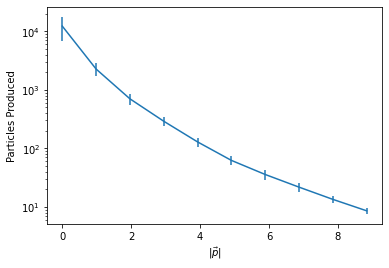

In [17]:
plt.errorbar(momentaArr, meanArr, yerr=errorArr)
plt.yscale('log')
plt.ylabel('Particles Produced')
plt.xlabel(r'$|\vec p|$')
#plt.savefig('test_su3.png')
plt.show()